In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

In [5]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [6]:
df.set_index('Month',inplace=True)

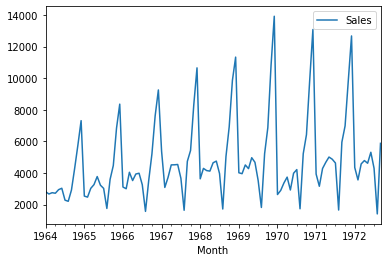

In [7]:
df.plot()

In [8]:
#divide into train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

In [9]:
train

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1969-09-01,5222.0
1969-10-01,6872.0
1969-11-01,10803.0


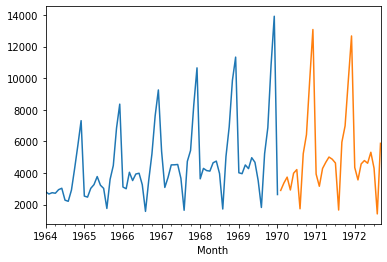

In [10]:
#plotting the data
train['Sales'].plot()
valid['Sales'].plot()

In [11]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(train['Sales'], start_p=1, start_q=1,max_p=3, max_q=3, m=25,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True,)
model.fit(train['Sales'])

C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=882.185, BIC=891.436, Fit time=2.455 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 25); AIC=901.999, BIC=905.699, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 25); AIC=899.124, BIC=906.524, Fit time=0.339 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=881.469, BIC=888.870, Fit time=2.012 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 25); AIC=886.066, BIC=895.317, Fit time=1.020 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 25); AIC=882.067, BIC=887.617, Fit time=0.271 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 25); AIC=881.687, BIC=890.938, Fit time=4.418 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 25); AIC=885.616, BIC=896.717, Fit time=8.490 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 25); AIC=895.729, BIC=901.279, Fit time=1.022 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 25), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [18]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Sales'], trend='n', order=(1, 1, 0),seasonal_order=(1, 1, 0, 12),enforce_invertibility=False)
results = mod.fit()

C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [19]:
forecast = results.predict(n_periods=len(valid))
#forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [20]:
forecast

1964-01-01        0.000000
1964-02-01     2440.817289
1964-03-01     2780.082081
1964-04-01     2715.598869
1964-05-01     2736.010501
                  ...     
1969-09-01     4904.952438
1969-10-01     6879.710438
1969-11-01     9822.206905
1969-12-01    11990.859643
1970-01-01     6023.904719
Freq: MS, Length: 73, dtype: float64

C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


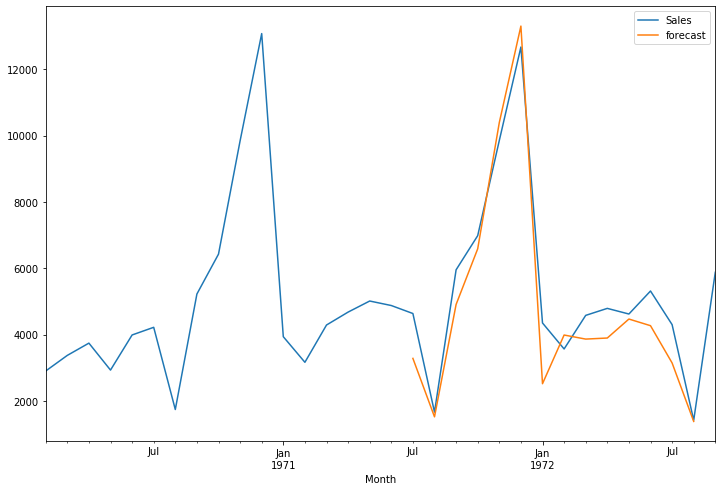

In [21]:
valid['forecast']=results.predict(start=90,end=103,dynamic=True)
valid[['Sales','forecast']].plot(figsize=(12,8))

In [22]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [23]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [24]:
future_df=pd.concat([df,future_datest_df])

C:\Users\Affan\Anaconda3\envs\titanic-project\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


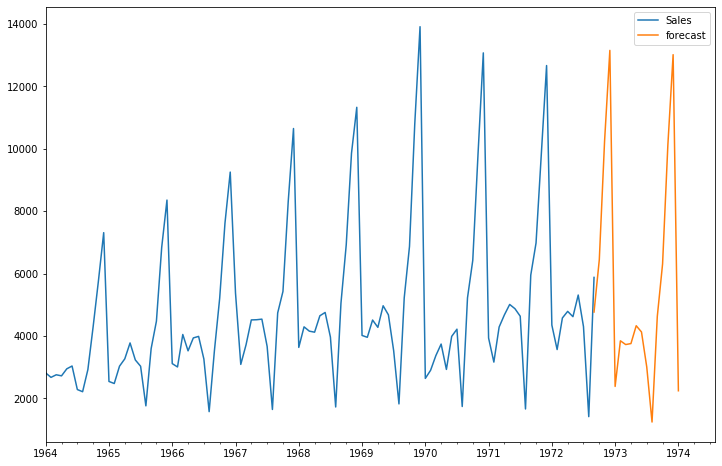

In [25]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 